In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

plt.style.use('ggplot')
sns.set_theme(palette="pastel")
sns.set_style("white")

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")

In [39]:
datasets?

Type:        module
String form: <module 'sklearn.datasets' from 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\sklearn\\datasets\\__init__.py'>
File:        c:\users\lenovo\appdata\local\programs\python\python312\lib\site-packages\sklearn\datasets\__init__.py
Docstring:   Utilities to load popular datasets and artificial data generators.

In [40]:
iris = datasets.load_iris()

In [35]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
dataset = pd.DataFrame(data = np.c_[iris['data']],
                       columns = iris['feature_names'])
dataset['class'] = iris['target']

In [37]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
print(dataset['class'].unique())

[0 1 2]


In [39]:
correlations = dataset.corr()

In [40]:
def summary_statistics(data, corr):
    # Hitung statistik dasar
    min_values = data.min()[:4]
    max_values = data.max()[:4]
    mean_values = data.mean()[:4]
    std_values = data.std()[:4]
    class_corr = corr['class'][:4]
    
    print("Summary Statistics:")
    print("             Min   Max   Mean    SD   Class Correlation")
    print("             ====  ====  =====  ====  =================")
    
    for col in data.columns[:4]:  
        corr_value = class_corr[col]
        high_corr = " (high!)" if abs(corr_value) > 0.9 else ""
        print(f"{col:<12}: {min_values[col]:.1f}  {max_values[col]:.1f}   "
              f"{mean_values[col]:.2f}  {std_values[col]:.2f}   "
              f"{corr_value:.4f}{high_corr}")
    
    print("\nClass Distribution: 33.3% for each of 3 classes.")

In [41]:
summary_statistics(dataset, correlations)

Summary Statistics:
             Min   Max   Mean    SD   Class Correlation
             ====  ====  =====  ====  =================
sepal length (cm): 4.3  7.9   5.84  0.83   0.7826
sepal width (cm): 2.0  4.4   3.06  0.44   -0.4267
petal length (cm): 1.0  6.9   3.76  1.77   0.9490 (high!)
petal width (cm): 0.1  2.5   1.20  0.76   0.9565 (high!)

Class Distribution: 33.3% for each of 3 classes.


In [42]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [43]:
species_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
iris_df['species'] = iris_df['species'].map(species_names)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30236\431588643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='sepal length (cm)', data=iris_df, palette=custom_palette)


Text(0, 0.5, 'Sepal Length (cm)')

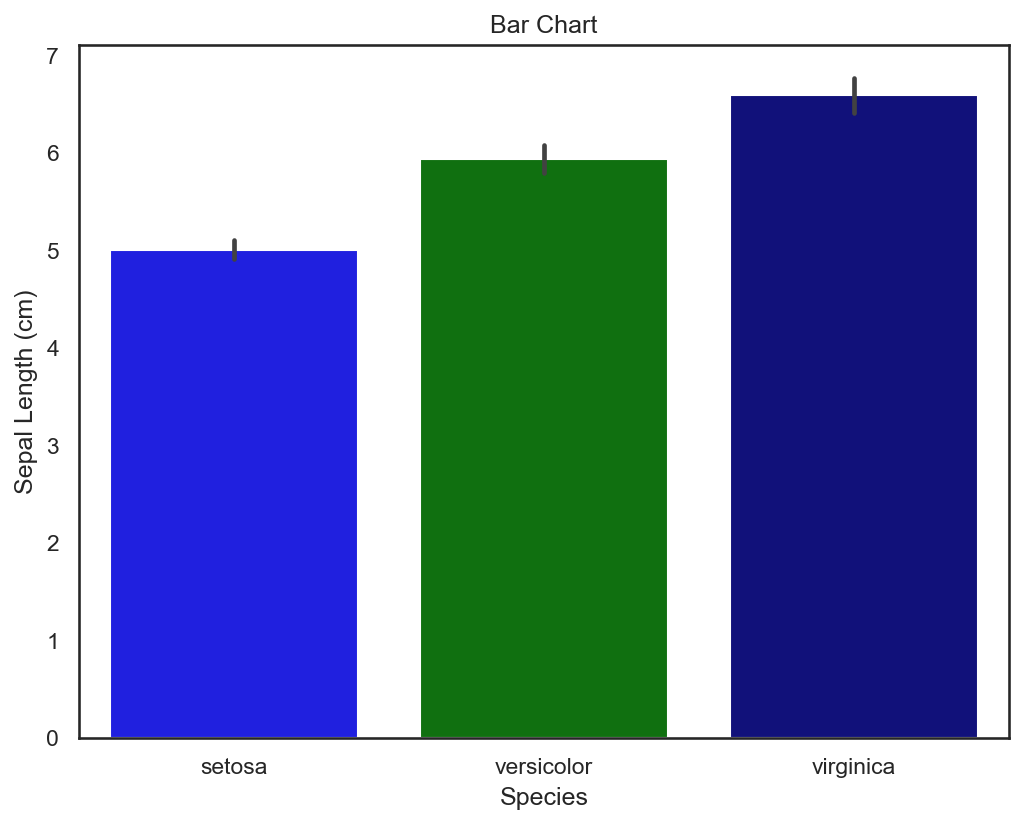

In [56]:
custom_palette = {"setosa": "blue", "versicolor": "green", "virginica": "darkblue"}

plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='sepal length (cm)', data=iris_df, palette=custom_palette)

plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

Text(0, 0.5, 'Frequency')

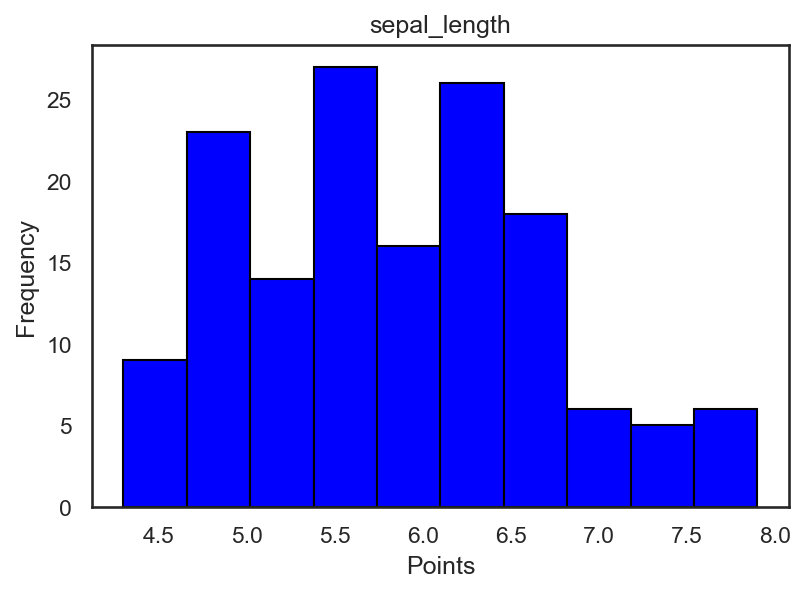

In [45]:
dataset = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

plt.figure(figsize=(6, 4))
plt.hist(dataset['sepal length (cm)'], bins=10, color='blue', edgecolor='black')
plt.title('sepal_length')
plt.xlabel('Points')
plt.ylabel('Frequency')

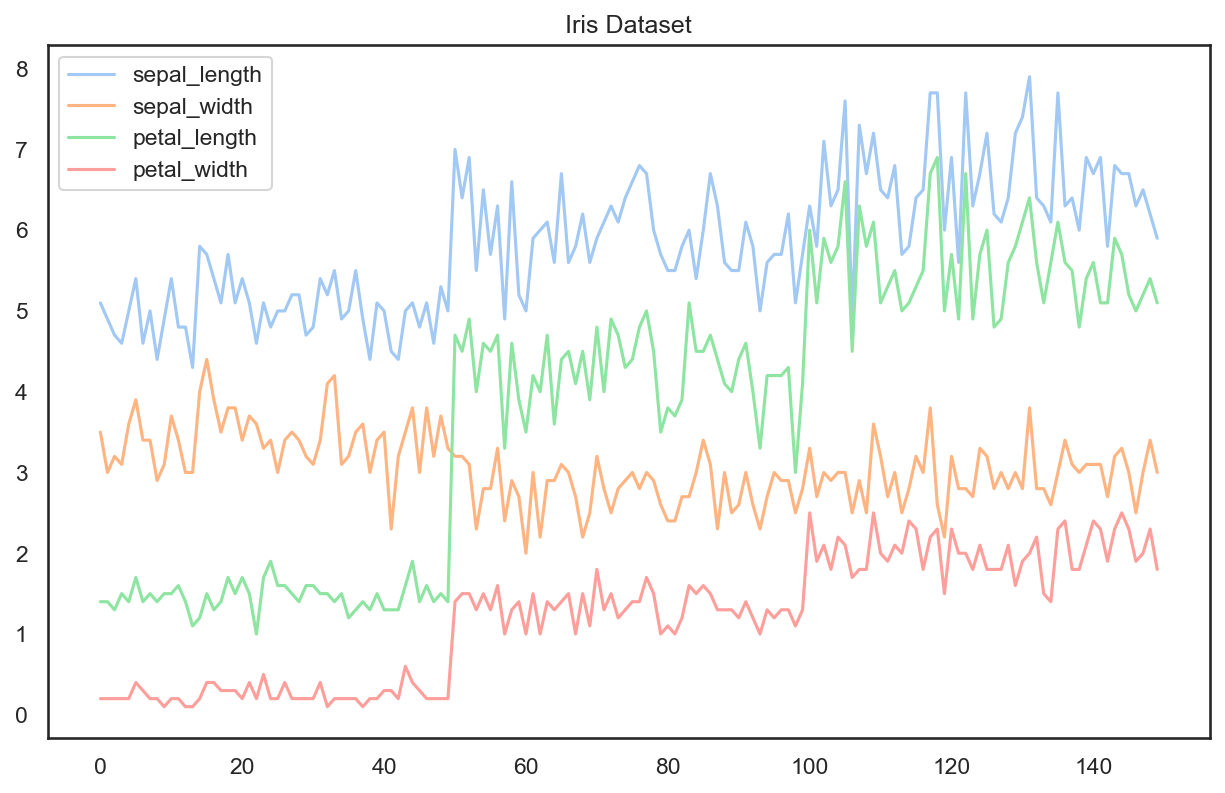

In [50]:
dataset = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

plt.figure(figsize=(10, 6))
plt.plot(dataset['sepal length (cm)'], label='sepal_length')
plt.plot(dataset['sepal width (cm)'], label='sepal_width')
plt.plot(dataset['petal length (cm)'], label='petal_length')
plt.plot(dataset['petal width (cm)'], label='petal_width')

plt.title('Iris Dataset')
plt.legend()

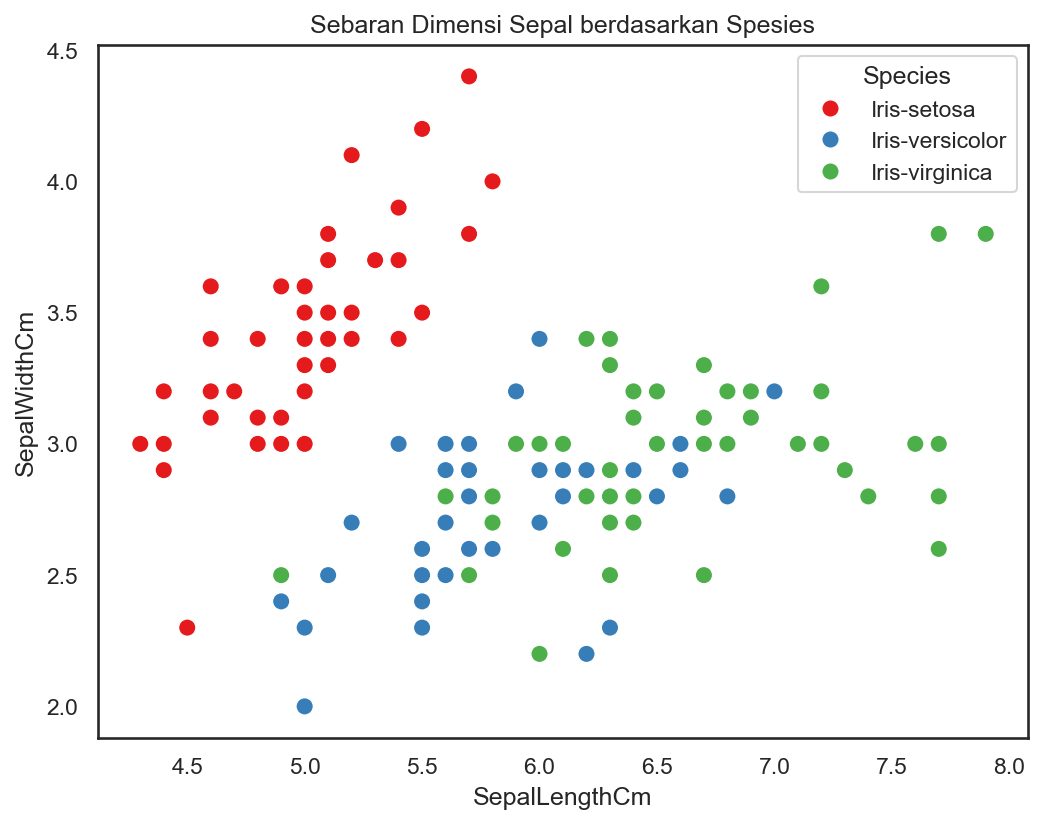

In [49]:
dataset = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
dataset['species'] = iris['target']
dataset['species'] = dataset['species'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

dataset.rename(columns={'sepal length (cm)': 'SepalLengthCm', 'sepal width (cm)': 'SepalWidthCm'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='SepalLengthCm', y='SepalWidthCm', hue='species', palette='Set1', s=70)

plt.title('Sebaran Dimensi Sepal berdasarkan Spesies')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(title='Species') 